<a href="https://colab.research.google.com/github/brianhphillips/testrepo/blob/main/RandomForest_MedicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
pip install matplotlib seaborn

In [11]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 1: Download the dataset
path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-attack-dataset-tarik-a-rashid


In [12]:
# Step 2: Load the dataset
csv_path = os.path.join(path, "Medicaldataset.csv")  # Adjust if needed
df = pd.read_csv(csv_path)

In [13]:
# Step 3: Preprocess
X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Step 5: Evaluation
y_pred = rf_model.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[ 98   3]
 [  2 161]]

Classification Report:
              precision    recall  f1-score   support

    negative       0.98      0.97      0.98       101
    positive       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

ROC AUC Score: 0.9911


<ipython-input-16-49aa854751ba>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


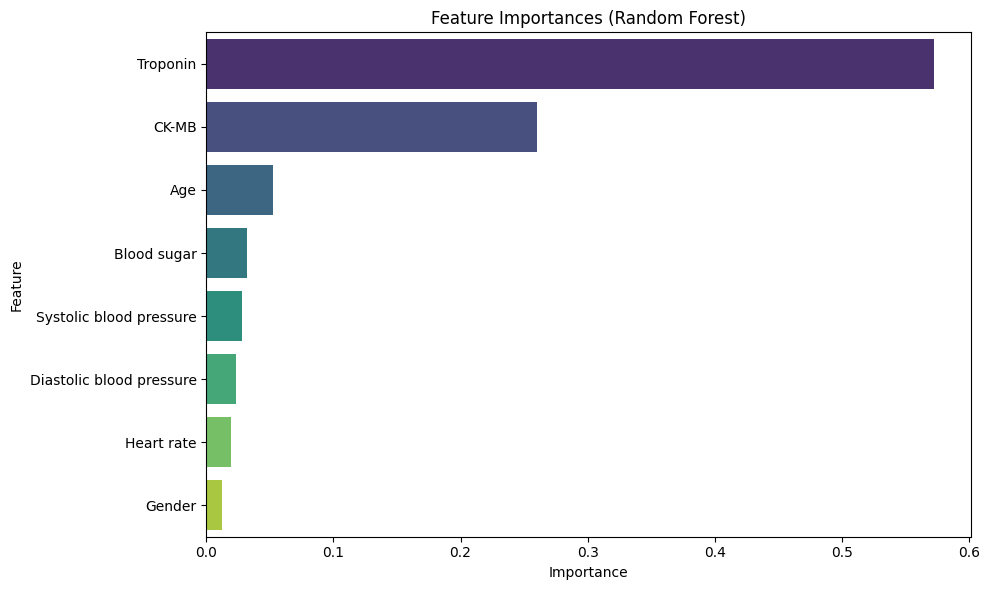

In [16]:
# Step 6: Plot Feature Importances
importances = rf_model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()